In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



PREPROCESSING:

In [6]:
df=pd.read_csv("C:/AI workforce/mlops/mlops-clustering/data/data.csv")
df.head()

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0


In [7]:
df.shape

(336, 3)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       336 non-null    float64
 1   y       336 non-null    float64
 2   color   336 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.0 KB


In [20]:
from sklearn.preprocessing import StandardScaler
X = df[["x", "y"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[-7.74793930e-01,  6.45929135e-01],
       [-1.78685736e+00,  8.75542061e-01],
       [-8.25017360e-01,  3.37776245e-01],
       [-1.11559708e+00,  7.74998045e-01],
       [-1.66008176e+00, -1.54054865e-01],
       [-7.69699577e-01,  7.60847493e-02],
       [-9.85655141e-01,  9.60324820e-01],
       [-1.11339704e+00,  8.66881497e-01],
       [-1.73742625e+00,  6.72456820e-01],
       [-1.68657284e+00,  2.76538945e-01],
       [-1.85481732e+00,  2.20699499e-01],
       [-1.45035503e+00,  9.14895000e-01],
       [-6.55857221e-01, -6.99406331e-02],
       [-1.10486051e+00,  2.50558980e-01],
       [-8.01503182e-01,  4.25792426e-01],
       [-1.16540789e+00, -1.96352141e-02],
       [-6.08561951e-01,  1.59046912e-01],
       [-7.40875944e-01,  4.94836865e-01],
       [-1.42746201e+00, -4.58168283e-01],
       [-1.11565006e+00, -3.89434066e-01],
       [-7.61776835e-01,  1.53955893e-01],
       [-9.53470752e-01,  8.45050322e-01],
       [-7.58123283e-01,  8.54071140e-01],
       [-1.

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans"] = kmeans.fit_predict(X_scaled)


dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN"] = dbscan.fit_predict(X_scaled)


agg = AgglomerativeClustering(n_clusters=3)
df["Agglomerative"] = agg.fit_predict(X_scaled)

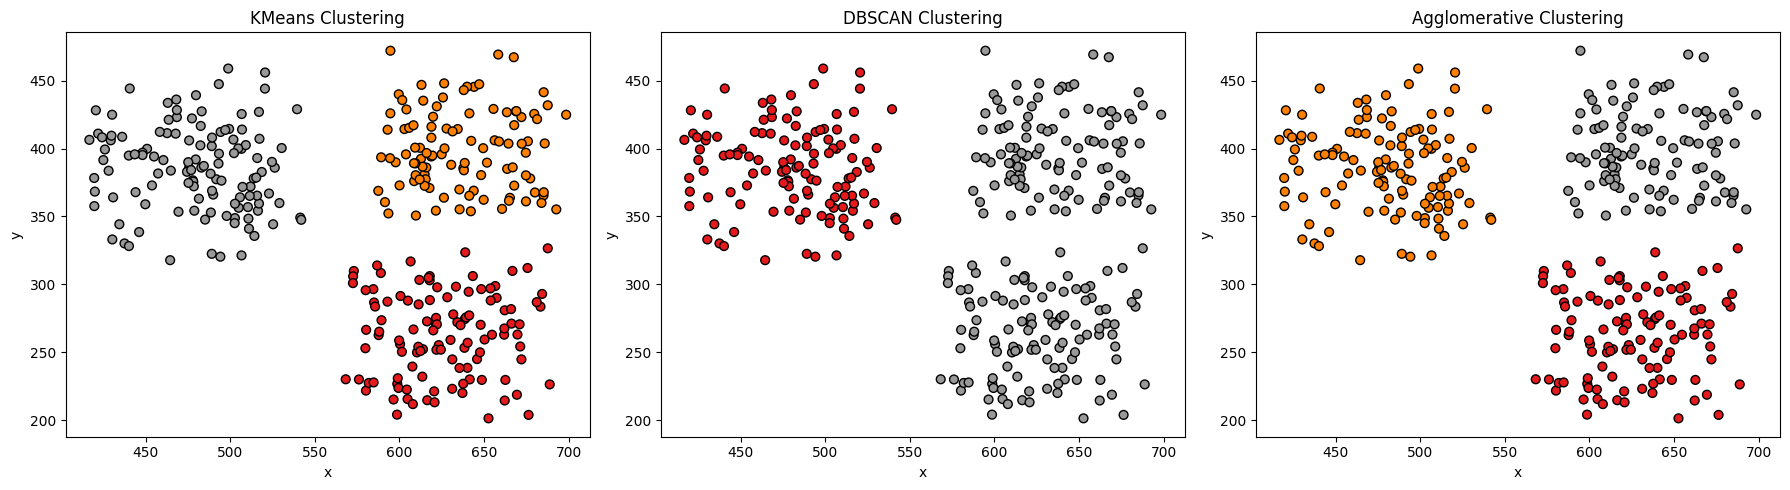

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


axes[0].scatter(df["x"], df["y"], c=df["KMeans"], cmap="Set1", s=40, edgecolor="k")
axes[0].set_title("KMeans Clustering")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")


axes[1].scatter(df["x"], df["y"], c=df["DBSCAN"], cmap="Set1", s=40, edgecolor="k")
axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("x")
axes[1].set_ylabel("y")


axes[2].scatter(df["x"], df["y"], c=df["Agglomerative"], cmap="Set1", s=40, edgecolor="k")
axes[2].set_title("Agglomerative Clustering")
axes[2].set_xlabel("x")
axes[2].set_ylabel("y")

plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import pandas as pd

true_labels = df["color"]  

metrics = {}

In [25]:
metrics["KMeans"] = {
    "Silhouette": silhouette_score(X_scaled, df["KMeans"]),
    "ARI": adjusted_rand_score(true_labels, df["KMeans"]),
    "NMI": normalized_mutual_info_score(true_labels, df["KMeans"])
}


if len(set(df["DBSCAN"])) > 1:
    sil_db = silhouette_score(X_scaled, df["DBSCAN"])
else:
    sil_db = None
metrics["DBSCAN"] = {
    "Silhouette": sil_db,
    "ARI": adjusted_rand_score(true_labels, df["DBSCAN"]),
    "NMI": normalized_mutual_info_score(true_labels, df["DBSCAN"])
}


metrics["Agglomerative"] = {
    "Silhouette": silhouette_score(X_scaled, df["Agglomerative"]),
    "ARI": adjusted_rand_score(true_labels, df["Agglomerative"]),
    "NMI": normalized_mutual_info_score(true_labels, df["Agglomerative"])
}


results = pd.DataFrame(metrics).T
print(results)

               Silhouette       ARI       NMI
KMeans           0.610956  0.922720  0.881411
DBSCAN           0.486498  0.562213  0.665856
Agglomerative    0.610956  0.922720  0.881411


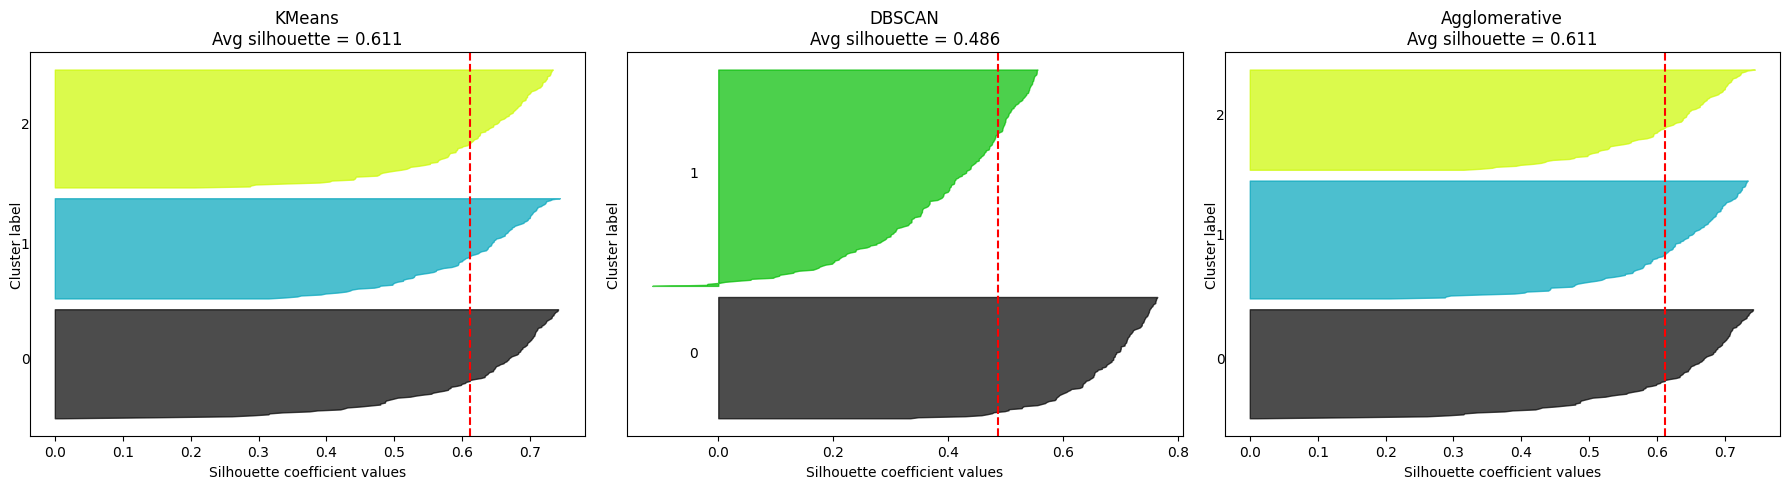

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X, labels, ax, title):

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    
    if n_clusters < 2:
        ax.text(0.5, 0.5, "Not enough clusters", ha="center", va="center")
        ax.set_axis_off()
        return
    

    silhouette_vals = silhouette_samples(X, labels)
    avg_score = silhouette_score(X, labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette = silhouette_vals[labels == i]
        ith_cluster_silhouette.sort()
        
        size = ith_cluster_silhouette.shape[0]
        y_upper = y_lower + size
        
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette,
                         facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * size, str(i))
        y_lower = y_upper + 10 
    
   
    ax.axvline(x=avg_score, color="red", linestyle="--")
    ax.set_title(f"{title}\nAvg silhouette = {avg_score:.3f}")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")
    ax.set_yticks([])


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_silhouette(X_scaled, df["KMeans"], axes[0], "KMeans")
plot_silhouette(X_scaled, df["DBSCAN"], axes[1], "DBSCAN")
plot_silhouette(X_scaled, df["Agglomerative"], axes[2], "Agglomerative")

plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

labels = df["KMeans"]
print("DBI:", davies_bouldin_score(X_scaled, labels))
print("CHI:", calinski_harabasz_score(X_scaled, labels))

DBI: 0.5394433881336602
CHI: 766.872748595964


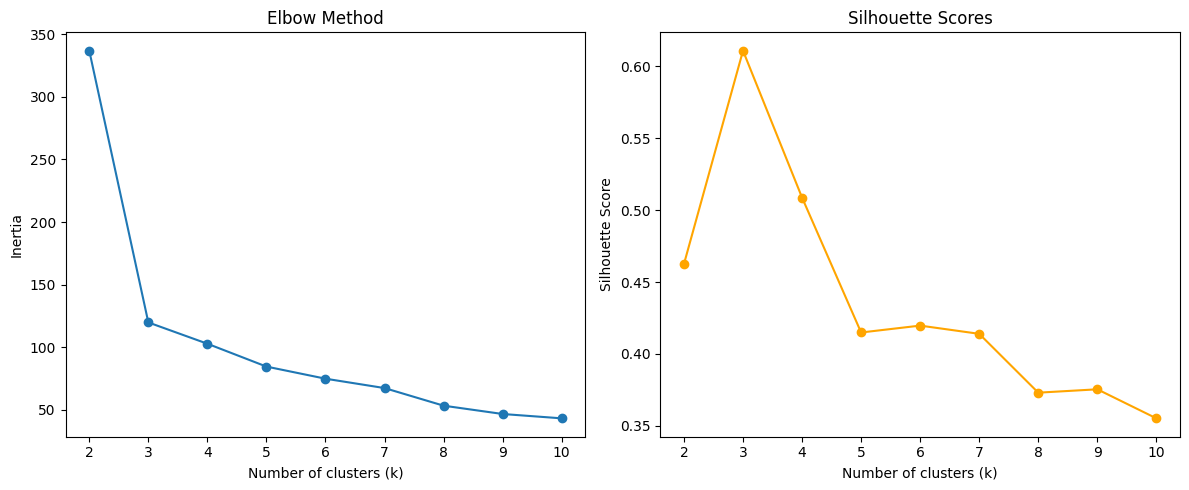

In [ ]:
k_values = range(2, 11)

inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")


plt.subplot(1,2,2)
plt.plot(k_values, silhouettes, marker="o", color="orange")
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

Cluster Centers (scaled):
[[ 0.62052876 -1.25709755]
 [ 0.76298367  0.73866233]
 [-1.2238557   0.53481575]]

Cluster Centers (original scale):
            x           y
0  626.033545  263.373386
1  637.266078  399.331838
2  480.604300  385.445064

Cluster vs True Color:
color     0    1   2
KMeans              
0         0  110   2
1         2    2  99
2       118    0   3


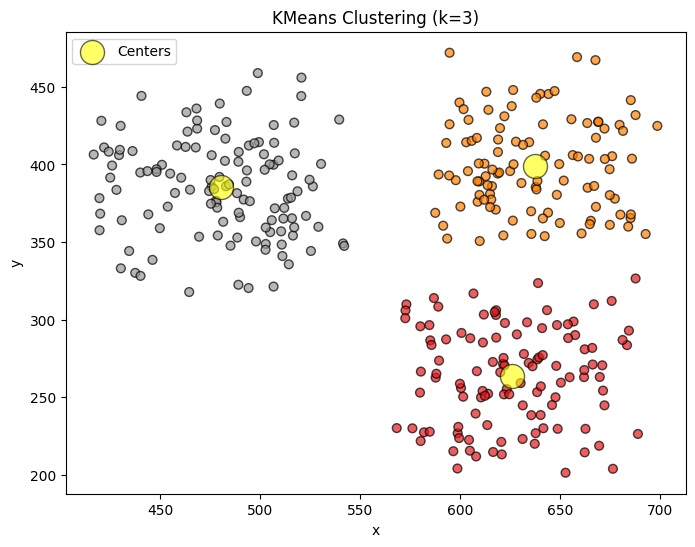

In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans"] = kmeans.fit_predict(X_scaled)


print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

centers_original = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster Centers (original scale):")
print(pd.DataFrame(centers_original, columns=["x", "y"]))


ct = pd.crosstab(df["KMeans"], df["color"])
print("\nCluster vs True Color:")
print(ct)

plt.figure(figsize=(8,6))
plt.scatter(df["x"], df["y"], c=df["KMeans"], cmap="Set1", s=40, edgecolor="k", alpha=0.7)
plt.scatter(centers_original[:,0], centers_original[:,1], c="yellow", s=300, marker="o", alpha=0.6,edgecolor="k", label="Centers")
plt.title("KMeans Clustering (k=3)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

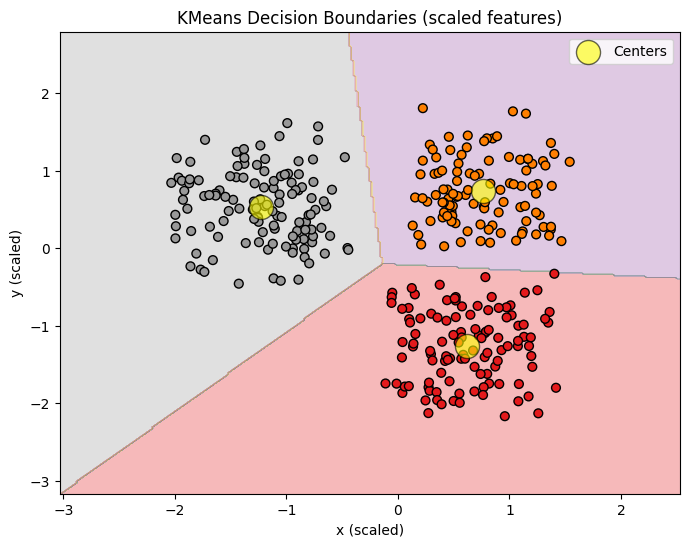

In [34]:
import numpy as np
import matplotlib.pyplot as plt


kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans"] = kmeans.fit_predict(X_scaled)


x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap="Set1", alpha=0.3)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df["KMeans"], cmap="Set1", s=40, edgecolor="k")


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="yellow", s=300, marker="o",alpha=0.6, edgecolor="k", label="Centers")

plt.title("KMeans Decision Boundaries (scaled features)")
plt.xlabel("x (scaled)")
plt.ylabel("y (scaled)")
plt.legend()
plt.show()
